In [2]:
%pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [3]:
from lifelines.datasets import load_rossi
from sklearn.preprocessing import LabelEncoder

In [4]:
df = load_rossi()
df
#  Week column shows the survival duration
# Arrest column shows the event (arrest) has occurred

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


In [5]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [6]:
kmf = KaplanMeierFitter()
kmf.fit(durations=df["week"],
        event_observed = df["arrest"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 432 total observations, 318 right-censored observations>

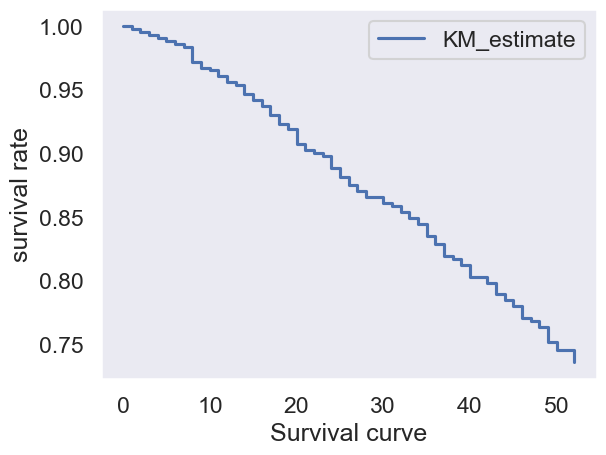

In [7]:
kmf.plot(ci_show=False)
plt.ylabel("survival rate")
plt.xlabel("Survival curve")
plt.show()

## Kaplan Meier Model with LogrankTest

In [13]:
import numpy as np
import pandas as pd
from string import ascii_lowercase
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines.statistics import logrank_test
sns.set(style='dark', context='talk')
# Kaplan-Meier curve
from lifelines import KaplanMeierFitter 
# Create a toy dataframe
df = pd.DataFrame(data={'duration': [3,9,5,8,7,2,1,3,4],
                        'duration2': [3,4,9,8,10,2,5,3,1],
                        'event': [1,0,1,0,1,0,1,0,0]}, 
                  index=list(ascii_lowercase[:9]))


In [14]:
df

,duration,duration2,event
a,3,3,1
b,9,4,0
c,5,9,1
d,8,8,0
e,7,10,1
f,2,2,0
g,1,5,1
h,3,3,0
i,4,1,0


In [20]:
results = logrank_test(durations_A=df['duration'],
                      event_observed_A=df['event'],
                      durations_B=df['duration2'],
                      event_observed_B=df['event'])
results = results.summary
print(f'P-value: {results.p[0]}')

P-value: 0.5995645467276011
